# t-SNE (t-Distributed Stochastic Neighbor Embedding)

### Step 1 - Import libraries

In [1]:
# Data manipulation
import pandas as pd # for data manipulation

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

# Skleran
from sklearn.datasets import load_digits # for MNIST data
from sklearn.manifold import TSNE # for t-SNE dimensionality reduction

### Step 2 - Load MNIST data

In [2]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


##### Show images of digits

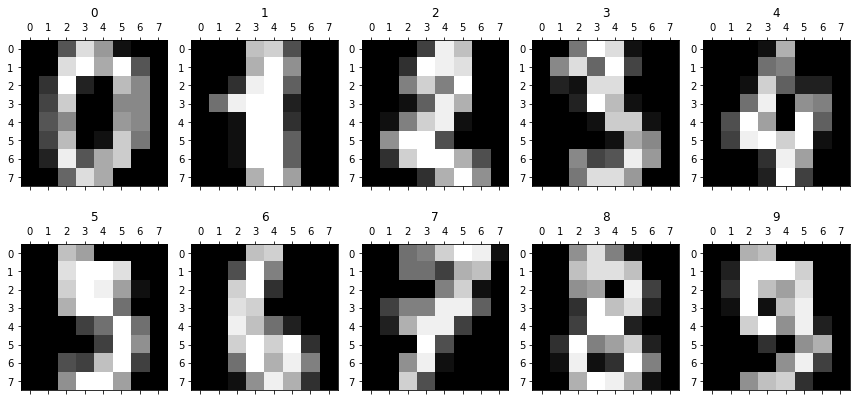

In [3]:
# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

### Step 3 - Use t-SNE embedding to reduce dimensions

In [11]:
embed = TSNE(
    n_components=2, # default=2, Dimension of the embedded space.
    perplexity=10, # default=30.0, The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
    early_exaggeration=12, # default=12.0, Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. 
    learning_rate=200, # default=200.0, The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers.
    n_iter=5000, # default=1000, Maximum number of iterations for the optimization. Should be at least 250.
    n_iter_without_progress=300, # default=300, Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. 
    min_grad_norm=0.0000001, # default=1e-7, If the gradient norm is below this threshold, the optimization will be stopped.
    metric='euclidean', # default=’euclidean’, The metric to use when calculating distance between instances in a feature array.
    init='random', # {‘random’, ‘pca’} or ndarray of shape (n_samples, n_components), default=’random’. Initialization of embedding
    verbose=0, # default=0, Verbosity level.
    random_state=42, # RandomState instance or None, default=None. Determines the random number generator. Pass an int for reproducible results across multiple function calls.
    method='barnes_hut', # default=’barnes_hut’. By default the gradient calculation algorithm uses Barnes-Hut approximation running in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. 
    angle=0.5, # default=0.5, Only used if method=’barnes_hut’ This is the trade-off between speed and accuracy for Barnes-Hut T-SNE.
    n_jobs=-1, # default=None, The number of parallel jobs to run for neighbors search. -1 means using all processors. 
)

# Transform X
X_embedded = embed.fit_transform(X)

# Print results
print('New Shape of X: ', X_embedded.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)
#print('Embedding vectors: ', embed.embedding_)

New Shape of X:  (1797, 2)
Kullback-Leibler divergence after optimization:  0.8206481337547302
No. of iterations:  4999


### Step 4 - Visualize t-SNE embedding on a 2D scatterplot with true labels

In [12]:
# Create a scatter plot
fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1], 
                 labels={
                     "x": "Dimension 1",
                     "y": "Dimension 2",
                 },
                 opacity=1, color=y.astype(str))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="t-SNE")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

# End of Program